In [15]:
import pandas as pd  # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
import numpy as np  # type: ignore
import matplotlib.pyplot as plt
import seaborn as sns  # type: ignore
import itertools
import os 
import sys
%matplotlib inline



In [19]:

def reduce_mem_usage(df):
    """Iterate through all the columns of a DataFrame and modify the data type to reduce memory usage."""
    start_mem = df.memory_usage().sum() / 1024**2
    print(f"Memory usage of dataframe is {start_mem:.2f} MB")

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:  # Exclude strings

            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)

            else:  # Convert floats
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print(f"Memory usage after optimization is: {end_mem:.2f} MB")
    print(f"Decreased by {(100 * (start_mem - end_mem) / start_mem):.1f}%")
    return df
#

In [20]:

cab_data = pd.read_csv("cab_rides.csv")
cab_data = reduce_mem_usage(cab_data)

weather_data = pd.read_csv("weather.csv")
weather_data = reduce_mem_usage(weather_data)

Memory usage of dataframe is 68.74 MB
Memory usage after optimization is: 49.57 MB
Decreased by 27.9%
Memory usage of dataframe is 0.38 MB
Memory usage after optimization is: 0.14 MB
Decreased by 62.5%


In [21]:
cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,pickup_datetime,hour_of_day,date_time
0,0.439941,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.950,0,1970-01-01 00:25:44.950
1,0.439941,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.280,0,1970-01-01 00:25:43.280
2,0.439941,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.370,0,1970-01-01 00:25:43.370
3,0.439941,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.550,0,1970-01-01 00:25:43.550
4,0.439941,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.460,0,1970-01-01 00:25:43.460


In [22]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'pickup_datetime',
       'hour_of_day', 'date_time'],
      dtype='object')

In [23]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [24]:
import datetime
cab_data['datetime'] = pd.to_datetime(cab_data['time_stamp'])
cab_data
weather_data['date_time'] = pd.to_datetime(weather_data['time_stamp'])

In [25]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind', 'date_time'],
      dtype='object')

In [26]:
cab_data.shape

(693071, 14)

In [27]:
weather_data.shape

(6276, 9)

In [28]:
cab_data.describe()

c:\python37\lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
c:\python37\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\python37\lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
c:\python37\lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
c:\python37\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\python37\lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
c:\python37\lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning

,distance,time_stamp,price,surge_multiplier,hour_of_day,datetime
count,693071.000000,6.930710e+05,637976.0,693071.0,693071.0,693071
mean,NaN,1.544046e+12,NaN,NaN,0.0,1970-01-01 00:25:44.045708261
min,0.020004,1.543200e+12,2.5,1.0,0.0,1970-01-01 00:25:43.200047104
25%,1.280273,1.543440e+12,9.0,1.0,0.0,1970-01-01 00:25:43.440039936
50%,2.160156,1.543740e+12,13.5,1.0,0.0,1970-01-01 00:25:43.740063744
75%,2.919922,1.544830e+12,22.5,1.0,0.0,1970-01-01 00:25:44.830058496
max,7.859375,1.545160e+12,97.5,3.0,0.0,1970-01-01 00:25:45.159966720
std,0.000000,6.892317e+08,0.0,0.0,0.0,NaN


In [29]:
weather_data.describe()

c:\python37\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\python37\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,temp,clouds,pressure,rain,time_stamp,humidity,wind,date_time
count,6276.000000,6276.000000,6276.000,894.000000,6.276000e+03,6276.000000,6276.000000,6276
mean,inf,0.677734,inf,0.057648,1.543857e+09,0.764160,6.800781,1970-01-01 00:00:01.543857377
min,19.625000,0.000000,988.000,0.000200,1.543204e+09,0.449951,0.290039,1970-01-01 00:00:01.543203644
25%,36.085938,0.439941,997.875,0.004902,1.543387e+09,0.669922,3.517090,1970-01-01 00:00:01.543386870
50%,40.125000,0.779785,1007.500,0.014847,1.543514e+09,0.759766,6.570312,1970-01-01 00:00:01.543513974
75%,42.843750,0.970215,1018.500,0.060913,1.544691e+09,0.890137,9.921875,1970-01-01 00:00:01.544690701
max,55.406250,1.000000,1035.000,0.780762,1.545159e+09,0.990234,18.187500,1970-01-01 00:00:01.545158702
std,6.019531,0.314209,12.875,0.100769,6.659340e+05,0.127319,3.632812,NaN


In [ ]:
# import pandas as pd

# # Load the CSV file into a DataFrame
# df = pd.read_csv('cab_rides.csv')

# # Print the existing columns and a few rows to understand the data
# print(df.head())
# print("Existing columns:", df.columns)

# # Add a new datetime column based on an existing column
# # For example, let's assume you have a 'time_stamp' column

# if 'time_stamp' in df.columns:
#     # Convert 'time_stamp' to datetime if necessary
#     df['date_time'] = pd.to_datetime(df['time_stamp'])

#     # Optionally, create additional columns based on the new datetime column
#     # Example: Extracting hour from the datetime
#     df['hour_of_day'] = df['date_time'].dt.hour

#     # Save the updated DataFrame back to the same CSV file
#     df.to_csv('cab_rides.csv', index=False)
#     print("New column added and CSV file updated successfully.")
# else:
#     print("Error: 'time_stamp' column not found in the CSV file.")

In [33]:
# import pandas as pd

# # Load the cab data and weather data from CSV files
# cab_data = pd.read_csv('cab_rides.csv')
# weather_data = pd.read_csv('weather.csv')

# # Concatenate the two DataFrames
# a = pd.concat([cab_data, weather_data])

# # Display the result
# print(a)

a = pd.concat([cab_data, weather_data])

In [34]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,hour_of_day,date_time,datetime,temp,location,clouds,pressure,rain,humidity,wind
0,0.439941,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,0.0,1970-01-01 00:25:44.950,1970-01-01 00:25:44.949989376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.439941,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,0.0,1970-01-01 00:25:43.280,1970-01-01 00:25:43.280001024,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.439941,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,0.0,1970-01-01 00:25:43.370,1970-01-01 00:25:43.370047488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.439941,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,0.0,1970-01-01 00:25:43.550,1970-01-01 00:25:43.550009344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.439941,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,0.0,1970-01-01 00:25:43.460,1970-01-01 00:25:43.459962880,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
a['day'] = a.date_time.dt.day
a['hour_of_day'] = a.date_time.dt.hour
# import pandas as pd
# from datetime import datetime

# Example DataFrame 'a'
# data = {
#     'distance': [0.44, 0.44, 0.44, 0.44, 0.44],
#     'cab_type': ['Lyft', 'Lyft', 'Lyft', 'Lyft', 'Lyft'],
#     'time_stamp': [1.544950e+12, 1.543280e+12, 1.543370e+12, 1.543550e+12, 1.543460e+12],
#     'destination': ['North Station', 'North Station', 'North Station', 'North Station', 'North Station'],
#     'source': ['Haymarket Square', 'Haymarket Square', 'Haymarket Square', 'Haymarket Square', 'Haymarket Square'],
#     'price': [5.0, 11.0, 7.0, 26.0, 9.0],
#     'surge_multiplier': [1.0, 1.0, 1.0, 1.0, 1.0],
#     'id': ['424553bb-7174-41ea-aeb4-fe06d4f4b9d7', '4bd23055-6827-41c6-b23b-3c491f24e74d', '981a3613-77af-4620-a42a-0c0866077d1e', 'c2d88af2-d278-4bfd-a8d0-29ca77cc5512', 'e0126e1f-8ca9-4f2e-82b3-50505a09db9a'],
#     'product_id': ['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus'],
#     'name': ['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL'],
#     'temp': [42.42, 42.43, 42.5, 42.11, 43.13],
#     'location': ['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway', 'Financial District'],
#     'clouds': [1, 1, 0.81, 0.82, 0.15],
#     'pressure': [1012.12, 1012.14, 1012.15, 1012.13, 1012.15],
#     'rain': [0.1228, 0.1846, 0.1089, 0.0969, 0.1786],
#     'time_stamp': [1545003901, 1545003901, 1545003901, 1545003901, 1545003901],
#     'humidity': [0.77, 0.76, 0.76, 0.77, 0.75],
#     'wind': [11.25, 11.32, 11.07, 11.09, 11.49],
# }
# a = pd.DataFrame(data)

# # Convert 'time_stamp' to datetime
# # 'unit=ms' because your timestamps are in milliseconds
# a['date_time'] = pd.to_datetime(a['time_stamp'], unit='ms')

# # Add new columns for day and hour
# a['day'] = a['date_time'].dt.day
# a['hour'] = a['date_time'].dt.hour

# # Print the updated DataFrame
# print(a)


# import pandas as pd
# from datetime import datetime

# # Assuming 'a' is your DataFrame
# # Example DataFrame 'a'
# data = {
#     'distance': [0.44, 0.44, 0.44, 0.44, 0.44],
#     'cab_type': ['Lyft', 'Lyft', 'Lyft', 'Lyft', 'Lyft'],
#     'time_stamp': [1.544950e+12, 1.543280e+12, 1.543370e+12, 1.543550e+12, 1.543460e+12],
#     'destination': ['North Station', 'North Station', 'North Station', 'North Station', 'North Station'],
#     'source': ['Haymarket Square', 'Haymarket Square', 'Haymarket Square', 'Haymarket Square', 'Haymarket Square'],
#     'price': [5.0, 11.0, 7.0, 26.0, 9.0],
#     'surge_multiplier': [1.0, 1.0, 1.0, 1.0, 1.0],
#     'id': ['424553bb-7174-41ea-aeb4-fe06d4f4b9d7', '4bd23055-6827-41c6-b23b-3c491f24e74d', '981a3613-77af-4620-a42a-0c0866077d1e', 'c2d88af2-d278-4bfd-a8d0-29ca77cc5512', 'e0126e1f-8ca9-4f2e-82b3-50505a09db9a'],
#     'product_id': ['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus'],
#     'name': ['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL'],
#     'temp': [None, None, None, None, None],
#     'location': [None, None, None, None, None],
#     'clouds': [None, None, None, None, None],
#     'pressure': [None, None, None, None, None],
#     'rain': [None, None, None, None, None],
#     'humidity': [None, None, None, None, None],
#     'wind': [None, None, None, None, None]
# }
# a = pd.DataFrame(data)

# # Get the current datetime
# now = datetime.now()

# # Add a new column with the current datetime
# a['current_datetime'] = now

# # Print the updated DataFrame
# print(a)

In [38]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,hour_of_day,date_time,datetime,temp,location,clouds,pressure,rain,humidity,wind
0,0.439941,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,0.0,1970-01-01 00:25:44.950,1970-01-01 00:25:44.949989376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.439941,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,0.0,1970-01-01 00:25:43.280,1970-01-01 00:25:43.280001024,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.439941,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,0.0,1970-01-01 00:25:43.370,1970-01-01 00:25:43.370047488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.439941,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,0.0,1970-01-01 00:25:43.550,1970-01-01 00:25:43.550009344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.439941,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,0.0,1970-01-01 00:25:43.460,1970-01-01 00:25:43.459962880,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
a.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,date_time,datetime,temp,location,clouds,pressure,rain,humidity,wind,day
6271,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1970-01-01 00:00:01.543819974,NaT,44.71875,North Station,0.890137,1000.5,NaN,0.959961,1.519531,NaN
6272,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1970-01-01 00:00:01.543819974,NaT,44.84375,Northeastern University,0.879883,1000.5,NaN,0.959961,1.540039,NaN
6273,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1970-01-01 00:00:01.543819974,NaT,44.81250,South Station,0.890137,1000.5,NaN,0.959961,1.540039,NaN
6274,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1970-01-01 00:00:01.543819974,NaT,44.78125,Theatre District,0.890137,1000.5,NaN,0.959961,1.540039,NaN
6275,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1970-01-01 00:00:01.543819974,NaT,44.68750,West End,0.890137,1000.5,NaN,0.959961,1.519531,NaN


In [45]:
a.fillna(0, inplace=True)

C:\Users\asusm\AppData\Local\Temp\ipykernel_2724\2802702672.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  a.fillna(0, inplace=True)


In [46]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,date_time,datetime,temp,location,clouds,pressure,rain,humidity,wind,day
0,0.439941,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1970-01-01 00:25:44.950,1970-01-01 00:25:44.949989376,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.439941,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,1970-01-01 00:25:43.280,1970-01-01 00:25:43.280001024,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.439941,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,1970-01-01 00:25:43.370,1970-01-01 00:25:43.370047488,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.439941,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,1970-01-01 00:25:43.550,1970-01-01 00:25:43.550009344,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.439941,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,1970-01-01 00:25:43.460,1970-01-01 00:25:43.459962880,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'pickup_datetime',
       'hour_of_day', 'date_time', 'datetime', 'temp', 'location', 'clouds',
       'pressure', 'rain', 'humidity', 'wind', 'day'],
      dtype='object')

In [48]:
a.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,pickup_datetime,...,date_time,datetime,temp,location,clouds,pressure,rain,humidity,wind,day
cab_type,,,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,...,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,...,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,...,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


<Axes: xlabel='cab_type'>

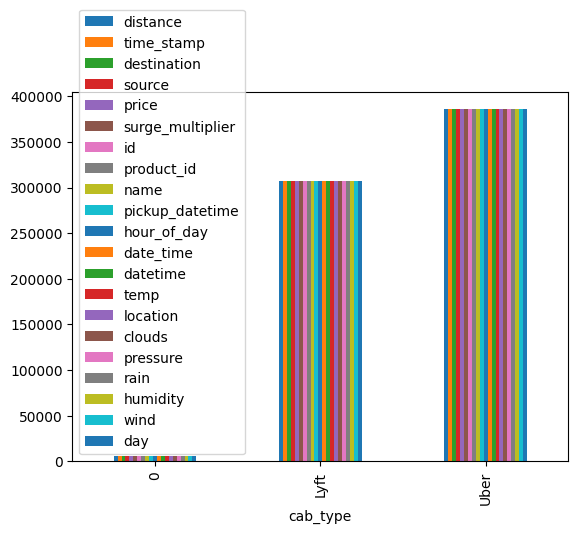

In [49]:
a.groupby('cab_type').count().plot.bar()

<Axes: xlabel='price'>

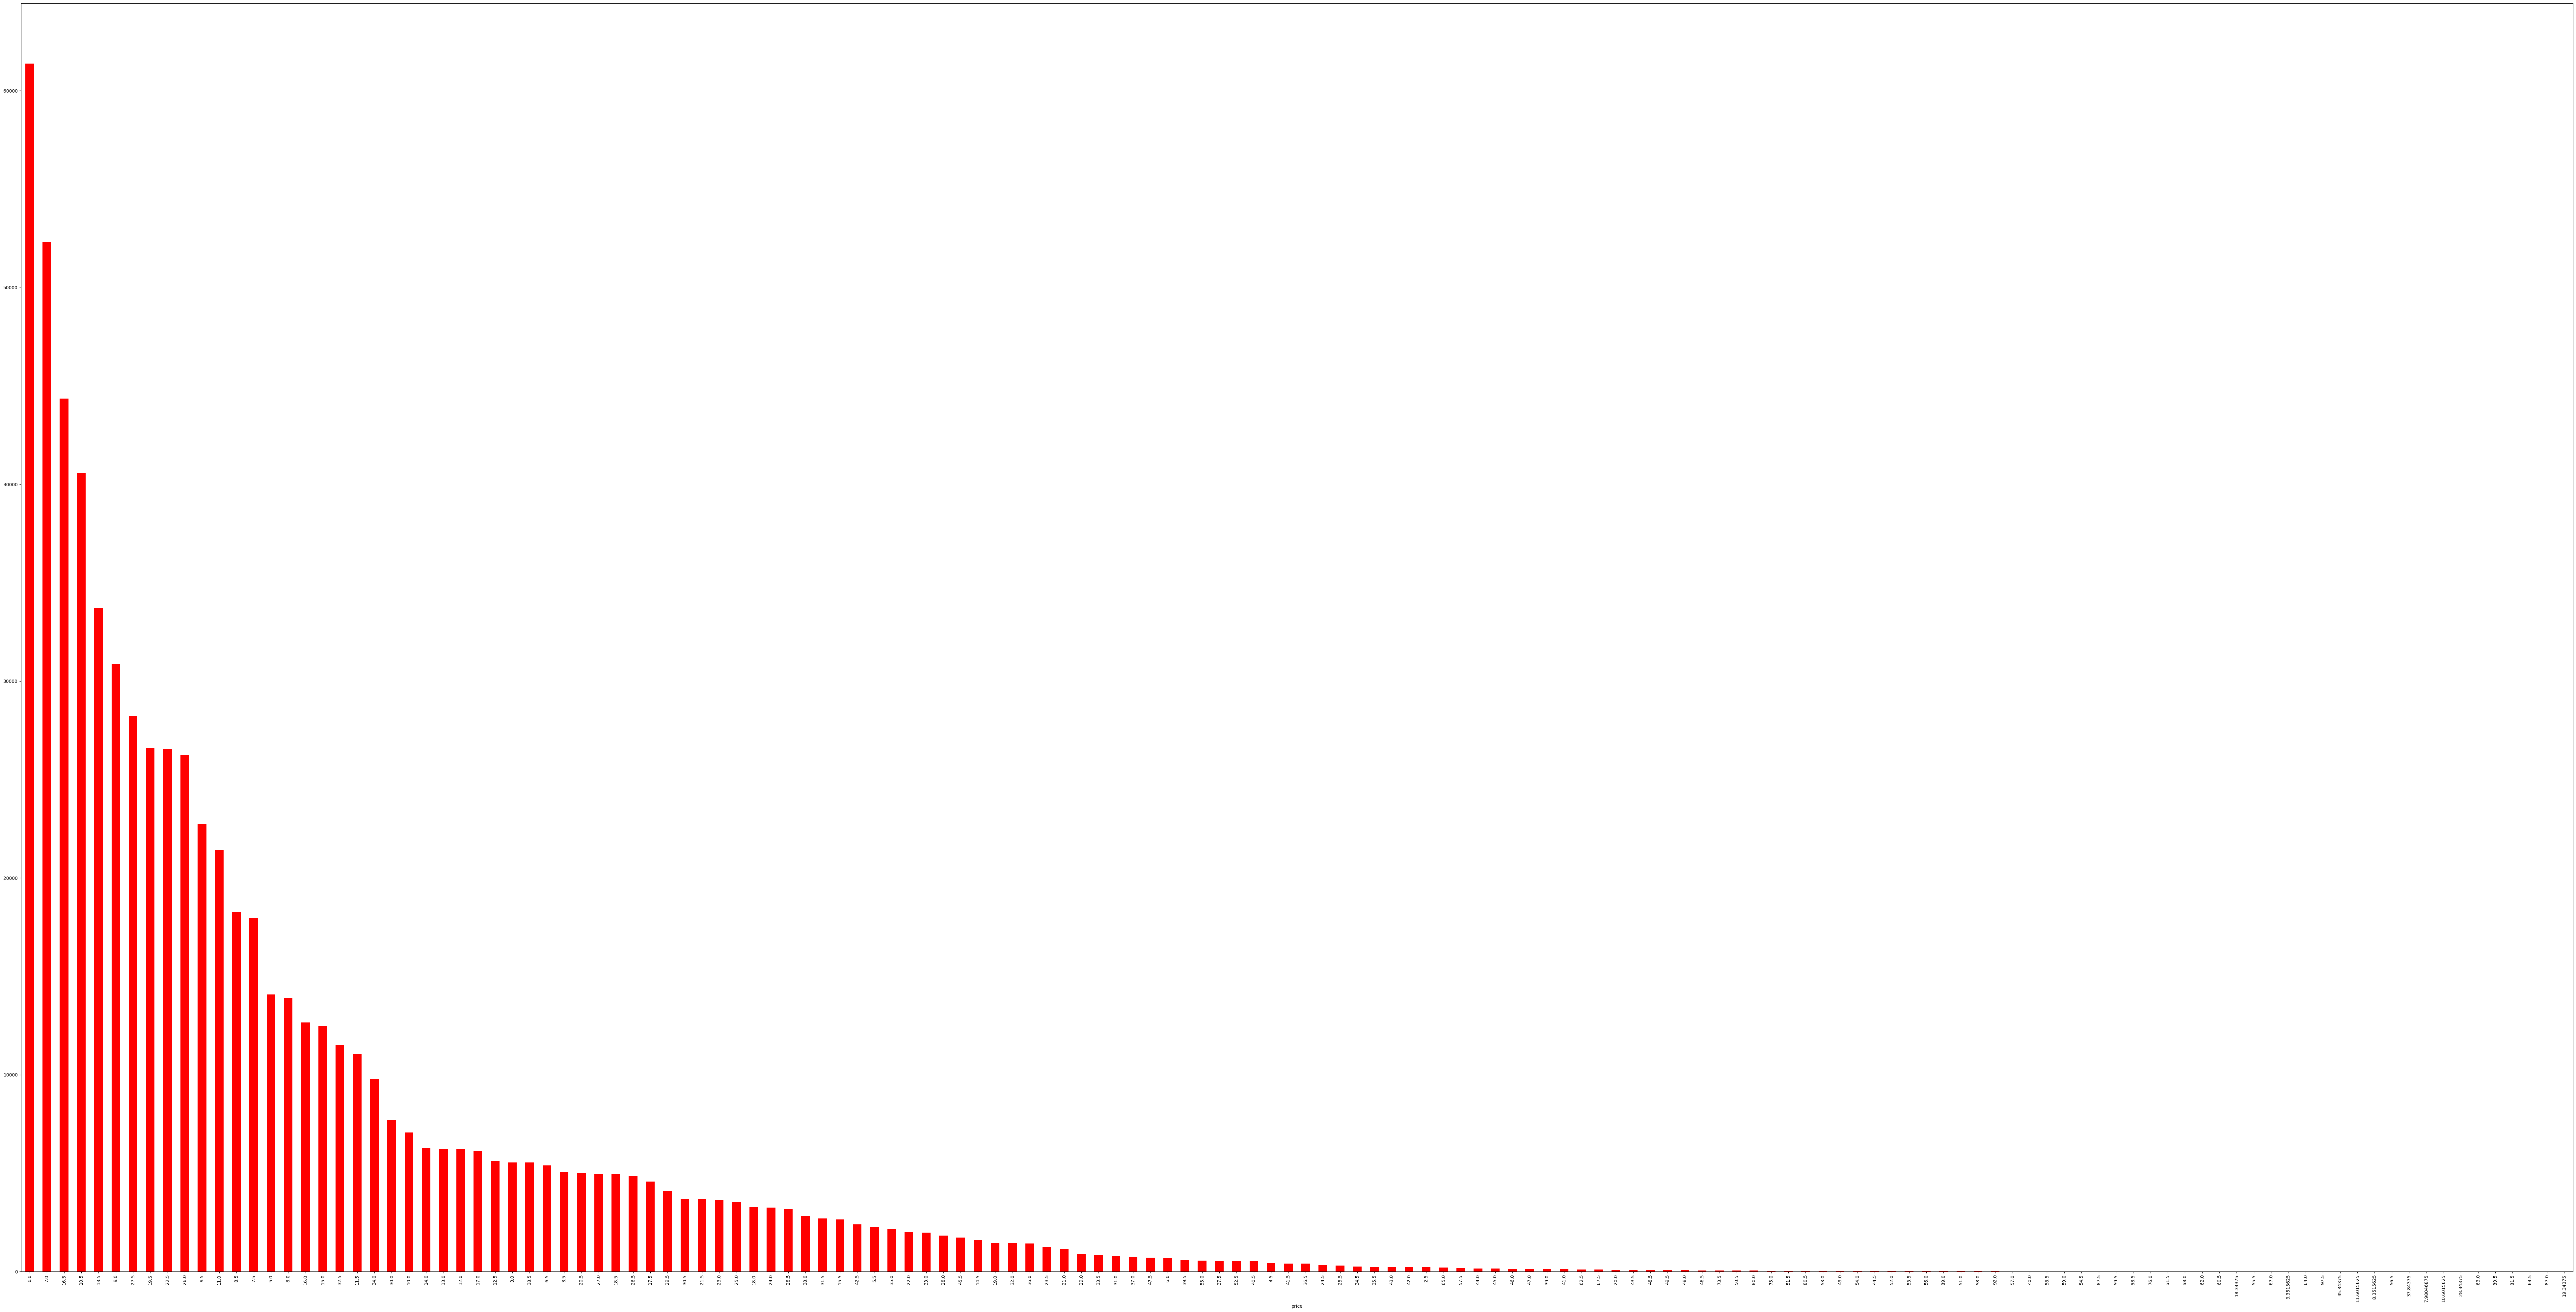

In [50]:
a['price'].value_counts().plot(kind='bar', figsize=(100, 50), color='red')

<Axes: xlabel='hour_of_day'>

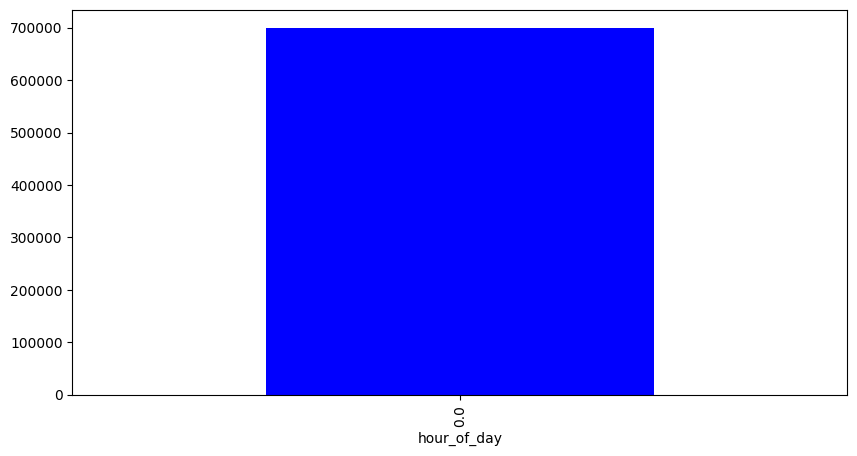

In [51]:
a['hour_of_day'].value_counts().plot(kind='bar', figsize=(10, 5), color='blue')

In [313]:
# import matplotlib.pyplot as plt
# a = pd.DataFrame(data)

# # Convert 'time_stamp' to datetime and extract hour
# a['date_time'] = pd.to_datetime(a['time_stamp'], unit='ms')
# a['hour'] = a['date_time'].dt.hour

# # Plot the value counts of the 'hour' column
# a['hour'].value_counts().sort_index().plot(
#     kind='bar', figsize=(10, 5), color='blue')

# # Set titles and labels for better readability
# plt.title('Count of Rides by Hour')
# plt.xlabel('Hour of Day')
# plt.ylabel('Count')
# plt.xticks(range(24), [f'{h}:00' for h in range(24)], rotation=45)
# plt.grid(axis='y')

# # Show the plot
# plt.show()

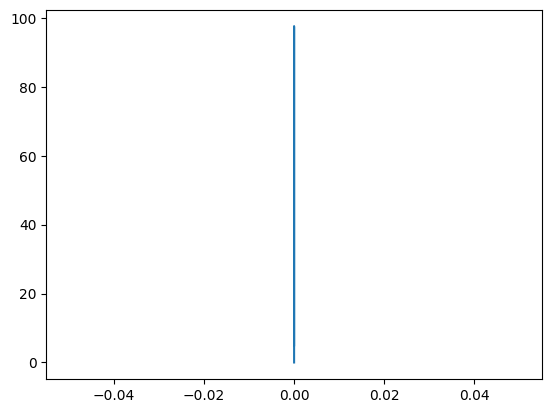

In [57]:
import matplotlib.pyplot as plt
x = a['hour_of_day']
y = a['price']
plt.plot(x, y)
plt.show()

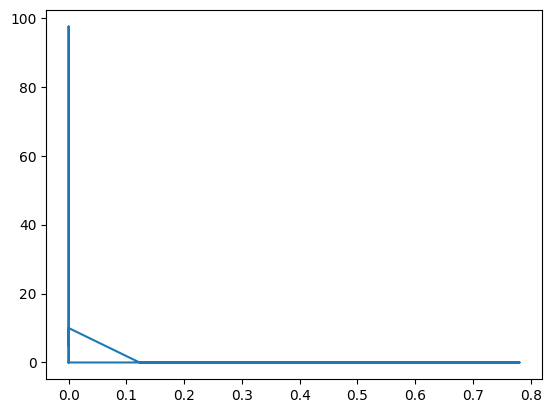

In [58]:
x = a['rain']
y = a['price']
plt.plot(x, y)
plt.show()

In [59]:
x1 = a[['distance', 'temp', 'humidity', 'wind',
        'rain', 'hour_of_day', 'surge_multiplier', 'clouds']]
y1 = a['price']

In [60]:
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(
    x1, y1, test_size=0.25, random_state=42)

In [61]:
linear = LinearRegression()
linear.fit(x_train, x_test)

LinearRegression()

In [62]:
predictions = linear.predict(y_train)
predictions

array([32.44410085, 14.76182893, 16.81756437, ..., 11.83712319,
       11.86195092, 13.23492398])

In [63]:

import pandas as pd
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df

,Actual,Predicted
81607,42.5,32.444101
354,0.0,14.761829
471801,32.5,16.817564
407645,27.5,10.488978
474760,27.5,10.565323
...,...,...
538489,7.5,10.717393
579511,13.5,15.521557
5421,9.0,11.837123
279982,8.0,11.861951


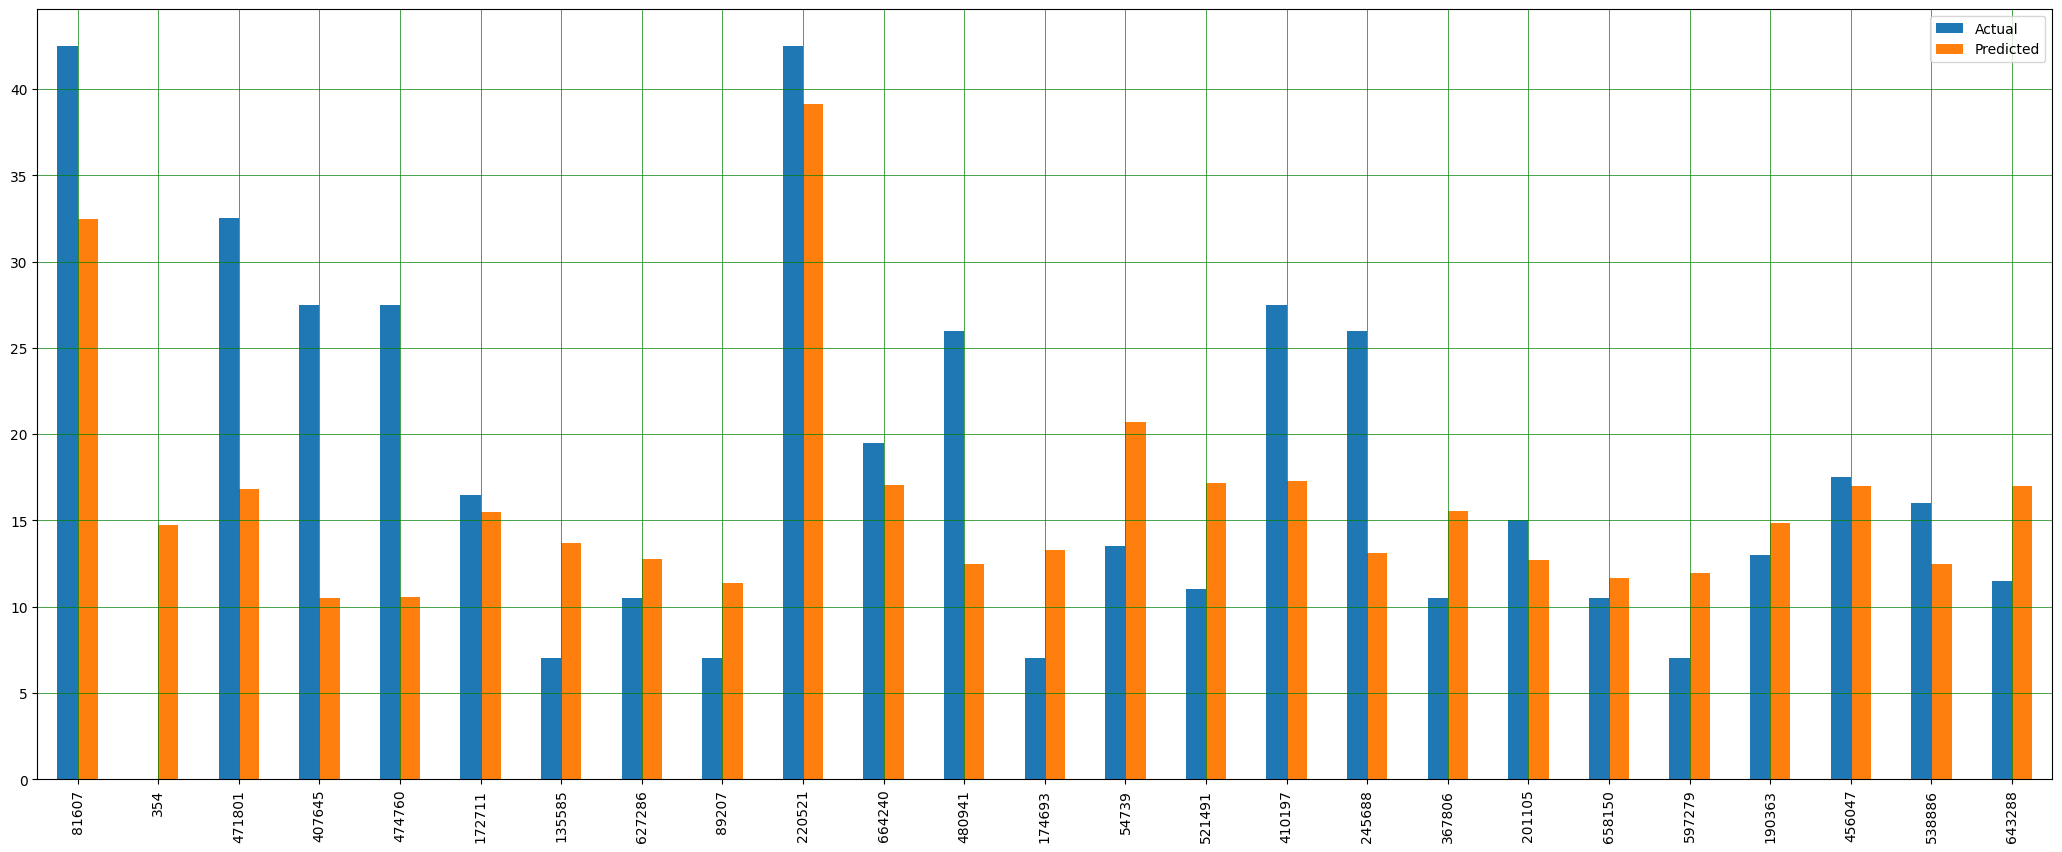

In [64]:
# import pandas as pd
# import matplotlib.pyplot as plt


df1 = df.head(25)
df1.plot(kind='bar', figsize=(26, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()